<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Regression_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
df.isnull().sum()

,0
age,66
sex,66
bmi,66
children,66
smoker,66
region,66
charges,54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [5]:
df.charges=df.charges.str.replace('$','')

In [6]:
df.charges=df.charges.astype(float)

In [7]:
df_filled=df.dropna()

In [8]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   float64
 1   sex       1207 non-null   object 
 2   bmi       1207 non-null   float64
 3   children  1207 non-null   float64
 4   smoker    1207 non-null   object 
 5   region    1207 non-null   object 
 6   charges   1207 non-null   float64
dtypes: float64(4), object(3)
memory usage: 75.4+ KB


In [9]:
df_filled.region.unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [11]:
df_filled.region=df_filled.region.str.lower()

In [12]:
df_filled.sex.unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [13]:
df_filled.sex=df_filled.sex.str.replace('female','F').str.replace('male','M').str.replace('woman','F').str.replace('man','M')

In [14]:
df_filled.sex.unique()

array(['F', 'M'], dtype=object)

In [15]:
df_filled.children=df_filled.children.astype(int)
df_filled.age=df_filled.age.astype(int)

In [60]:
df_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
611,38,F,34.800,2,no,southwest,6571.54400
649,58,F,32.965,0,no,northeast,12430.95335
1095,18,F,31.350,4,no,northeast,4561.18850
620,30,M,31.400,1,no,southwest,3659.34600
1017,26,F,34.200,2,no,southwest,3987.92600
322,34,M,30.800,0,yes,southwest,35491.64000
175,63,F,37.700,0,yes,southwest,48824.45000
306,28,F,27.500,2,no,southwest,20177.67113
790,39,F,41.800,0,no,southeast,5662.22500
1206,59,F,34.800,2,no,southwest,36910.60803


In [17]:
df_filled.age=df_filled.age.abs()
df_filled.children=df_filled.children.abs()

**Using scatterplots to find relationship between variable and charges**


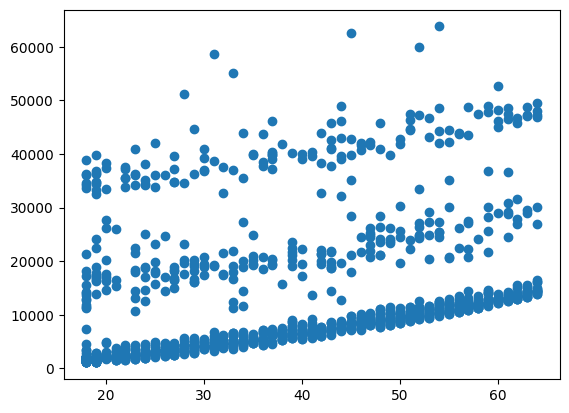

In [20]:
dfc=df_filled.copy()
plt.scatter(dfc.age,dfc.charges)

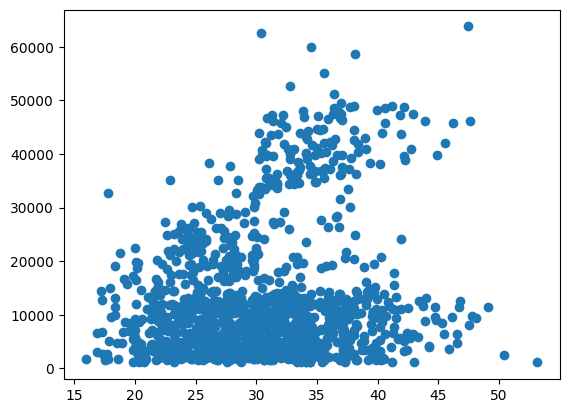

In [21]:
plt.scatter(dfc.bmi,dfc.charges)

**Preparing the data for model fitting**

In [ ]:
dfc = pd.get_dummies(dfc, columns=['sex', 'smoker', 'region'], dtype='int')

In [24]:
dfc.head()

,age,bmi,children,charges,sex_F,sex_M,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


**Fitting Linear regression to our data**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
#defining input and output variables
X=dfc.drop('charges',axis=1)
y=dfc.charges
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#creating and training the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)
#making predictions on the test set
y_pred=model.predict(X_test)

#calculating the R^2 score
r2=r2_score(y_test,y_pred)
print("R^2 score:",r2)


R^2 score: 0.7049323160872816


**testing on Validation dataset**

In [37]:
val_df=pd.read_csv("/content/validation_dataset.csv")
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [41]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     int64  
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     int64  
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [40]:
val_df.age=val_df.age.astype(int)
val_df.children=val_df.children.astype(int)

In [43]:
val_df.sex=val_df.sex.str.replace('female','F').str.replace('male','M')

In [51]:
val_df.sample(5)

,age,bmi,children,sex_F,sex_M,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
40,29,34.400,0,0,1,0,1,0,0,0,1
9,63,33.660,3,0,1,1,0,0,0,1,0
28,57,25.740,2,1,0,1,0,0,0,1,0
10,27,18.905,3,0,1,1,0,1,0,0,0
35,46,40.375,2,0,1,1,0,0,1,0,0


In [50]:
val_df = pd.get_dummies(val_df, columns=['sex', 'smoker', 'region'], dtype='int')

In [ ]:
dd=pd.read_csv("/content/validation_dataset.csv")

In [61]:
pred=model.predict(val_df)
dd['predicted_charges']=pred
dd.loc[dd['predicted_charges'] < 1000, 'predicted_charges'] = 1000
dd.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
